# Imports

In [5]:
import sys
sys.path.append("../src")

# Librairies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# SKlearn
from sklearn.tree import DecisionTreeClassifier 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score

# Matplotlib
import matplotlib.pyplot as plt

# Constants

In [6]:
train_path = "../data/train.csv"
train_not_norm_path = "../data/train_not_normalized.csv"

# Loading data

In [7]:
take_normalized_data = True

In [8]:
def preprocessing_data(data):
    scaler = StandardScaler()
    scaler.fit(data)
    return scaler.transform(data)

In [11]:
if take_normalized_data:
    # Already preprocessed data
    df_data = pd.read_csv(train_path, sep=",")
    X = df_data[df_data.columns.difference(["full_label", 'label'])].values
    
else:
    # Load data not preprocessed and preprocess it
    df_data = pd.read_csv(train_not_norm_path, sep=",")
    X = df_data[df_data.columns.difference(['label'])].values
    X = preprocessing_data(X)

y = df_data["label"].values

# Testing Decision Trees

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
clf    = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy=", accuracy_score(y_test, y_pred))

Accuracy= 0.8333333333333334


In [13]:
from sklearn.model_selection import cross_val_score
num_splits = 5 
accs = []
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.62

[Text(200.88000000000002, 181.2, 'X[5755] <= 6.717\ngini = 0.666\nsamples = 29\nvalue = [9, 10, 10]'),
 Text(133.92000000000002, 108.72, 'X[3396] <= 6.508\ngini = 0.499\nsamples = 19\nvalue = [9, 0, 10]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 9\nvalue = [9, 0, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 10]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 10\nvalue = [0, 10, 0]')]

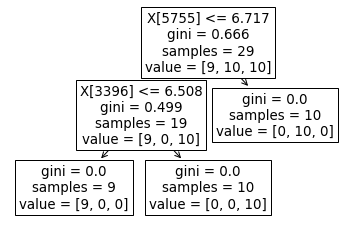

In [14]:
from sklearn import tree
tree.plot_tree(clf.fit(X, y)) 

In [15]:
from sklearn.model_selection import cross_validate
num_splits = 5 
scoring = ['accuracy', 'f1_macro']
clf = DecisionTreeClassifier()
scores = cross_validate(clf, X, y, cv=5, scoring=scoring)
for key in scores:
    print(key+' : '+str(scores[key].mean()))

fit_time : 0.040778827667236325
score_time : 0.0013667583465576173
test_accuracy : 0.7533333333333333
test_f1_macro : 0.7288888888888889


/home/gautier/anaconda3/envs/ada/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Predictions

In [15]:
PATH_TEST       = "../data/test.csv"
PATH_TEST_PREDS = "../data/test_predict.csv"
PATH_OUT        = "../data/Preds/preds_DecisionTrees.csv"

In [16]:
full_labels = pd.read_csv(PATH_TEST)["full_label"]
df_test     = pd.read_csv(PATH_TEST_PREDS)
X_to_pred   = df_test.values

In [17]:
clf    = DecisionTreeClassifier().fit(X, y)

In [18]:
preds = clf.predict(X_to_pred)
proba = clf.predict_proba(X_to_pred)

In [20]:
df_predictions = pd.DataFrame()
df_predictions["full_label"] = full_labels
df_predictions["predicted"] = preds
df_predictions["proba_0"] = proba[:,0]
df_predictions["proba_1"] = proba[:,1]
df_predictions["proba_2"] = proba[:,2]

In [23]:
df_predictions.to_csv(PATH_OUT, index=False)